In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

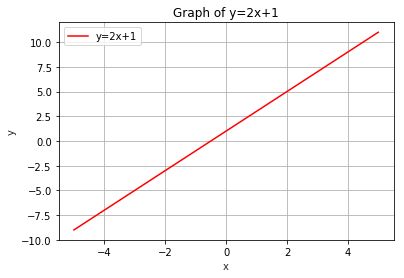

In [5]:
x = np.linspace(-5,5,10)
y = 2*x+1
plt.plot(x, y, '-r', label='y=2x+1')
plt.title('Graph of y=2x+1')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [2]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [13]:
print("The maximum salary is {}".format(data['salary'].max()))
print("The minimum salary is {}".format(data['salary'].min()))
print("The mean salary is {}".format(data['salary'].mean()))
print("The median of salary is {}".format(data['salary'].median()))

The maximum salary is 940000.0
The minimum salary is 0.0
The mean salary is 198702.32558139536
The median of salary is 240000.0


In [11]:
data['salary'].fillna(0,inplace = True)
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0


In [12]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [14]:
data.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [15]:
data.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


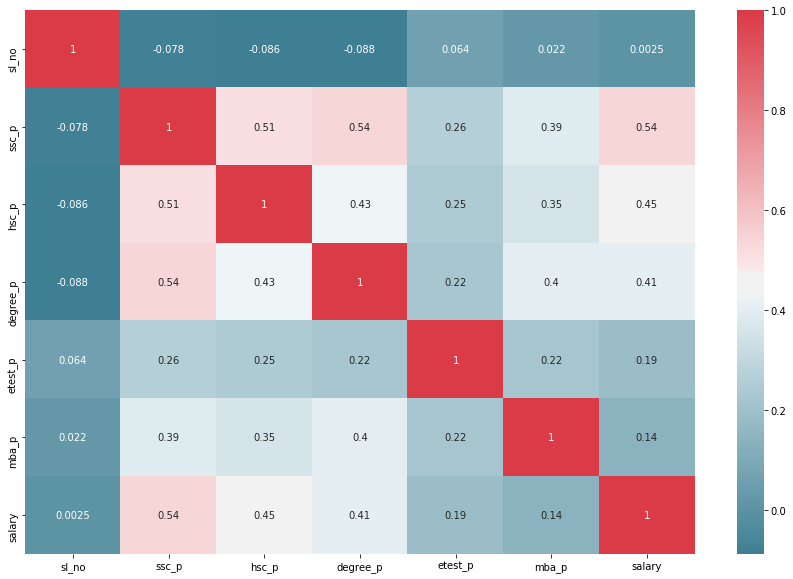

In [16]:
def correlation_heatmap(data1):
    _, ax = plt.subplots(figsize = (15, 10))
    colormap= sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(data.corr(), annot=True, cmap = colormap)

correlation_heatmap(data)

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 720x720 with 0 Axes>

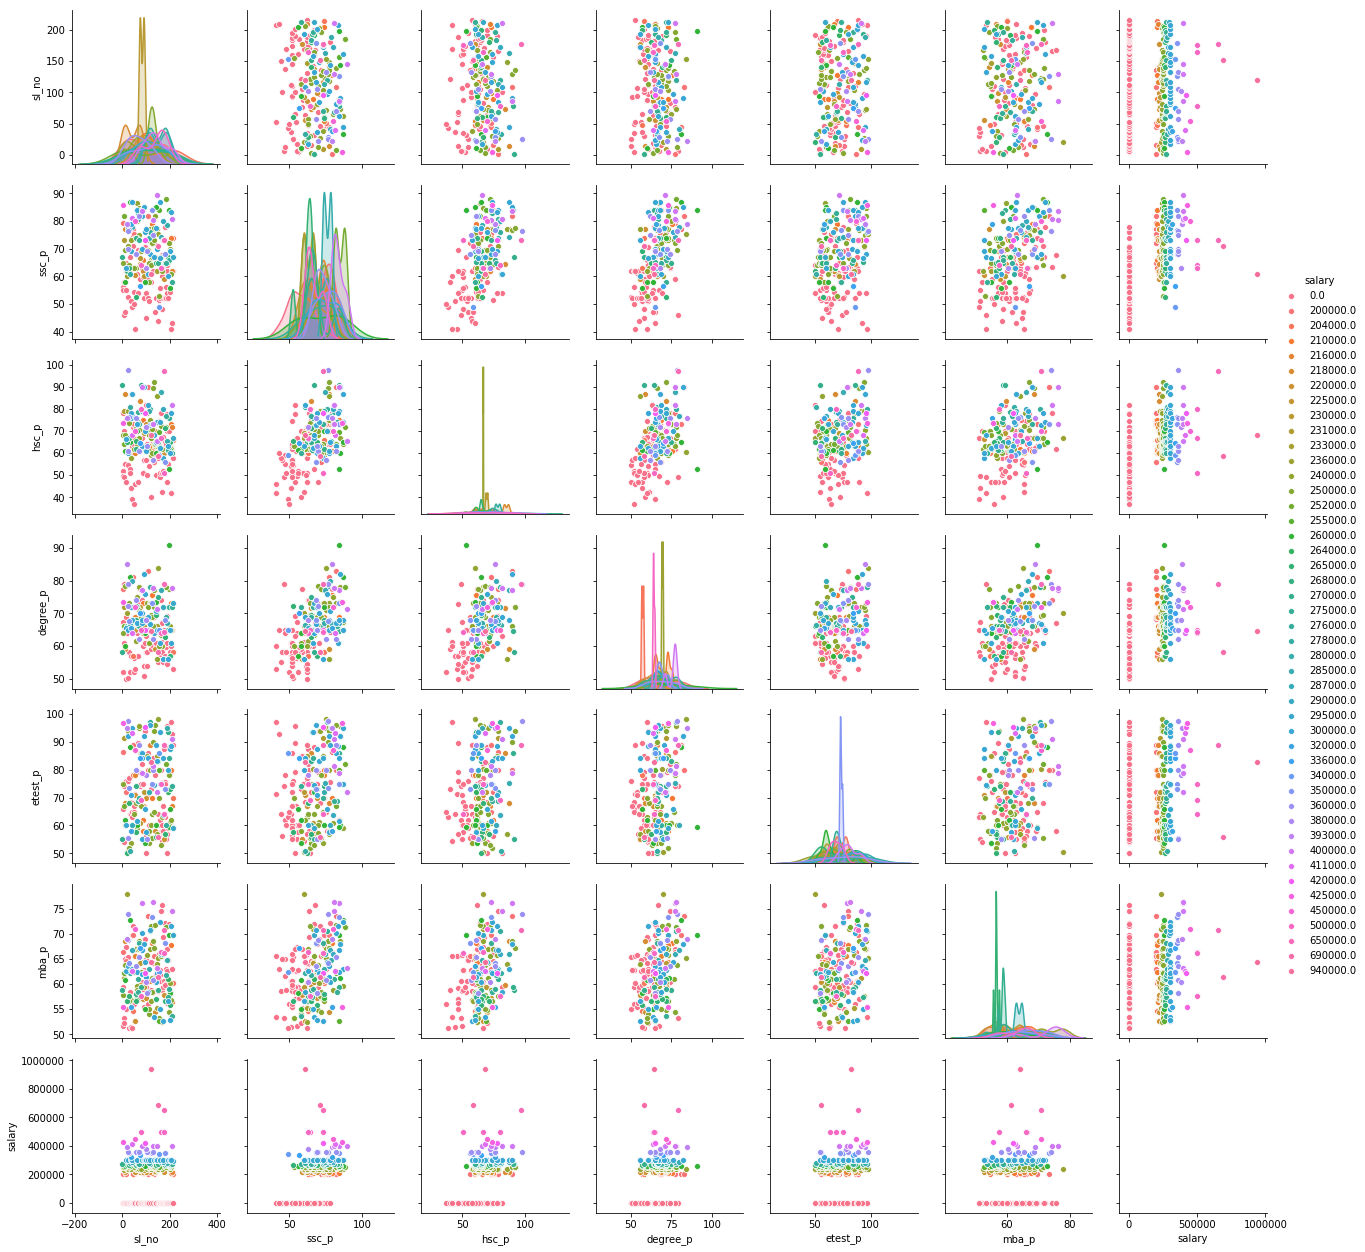

<Figure size 720x720 with 0 Axes>

In [21]:
sns.pairplot(data,hue='salary', palette='husl')
plt.figure(figsize =(10,10))

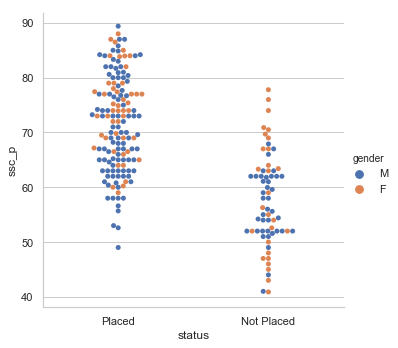

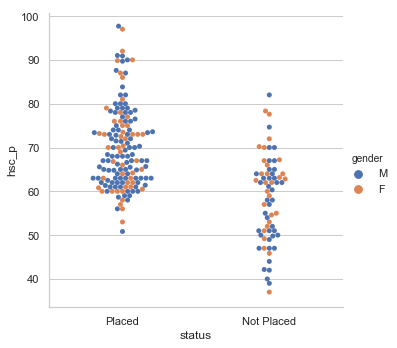

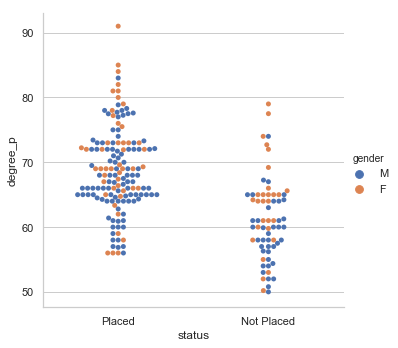

In [24]:
sns.catplot(x="status", y="ssc_p", data=data,kind="swarm",hue='gender')
sns.catplot(x="status", y="hsc_p", data=data,kind="swarm",hue='gender')
sns.catplot(x="status", y="degree_p", data=data,kind="swarm",hue='gender')

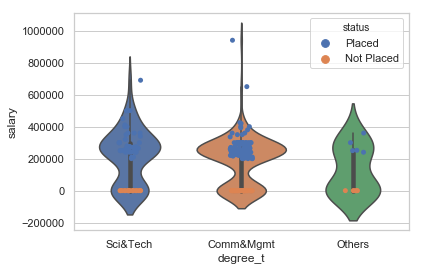

In [25]:
sns.violinplot(x="degree_t", y="salary", data=data)
sns.stripplot(x="degree_t", y="salary", data=data,hue='status')

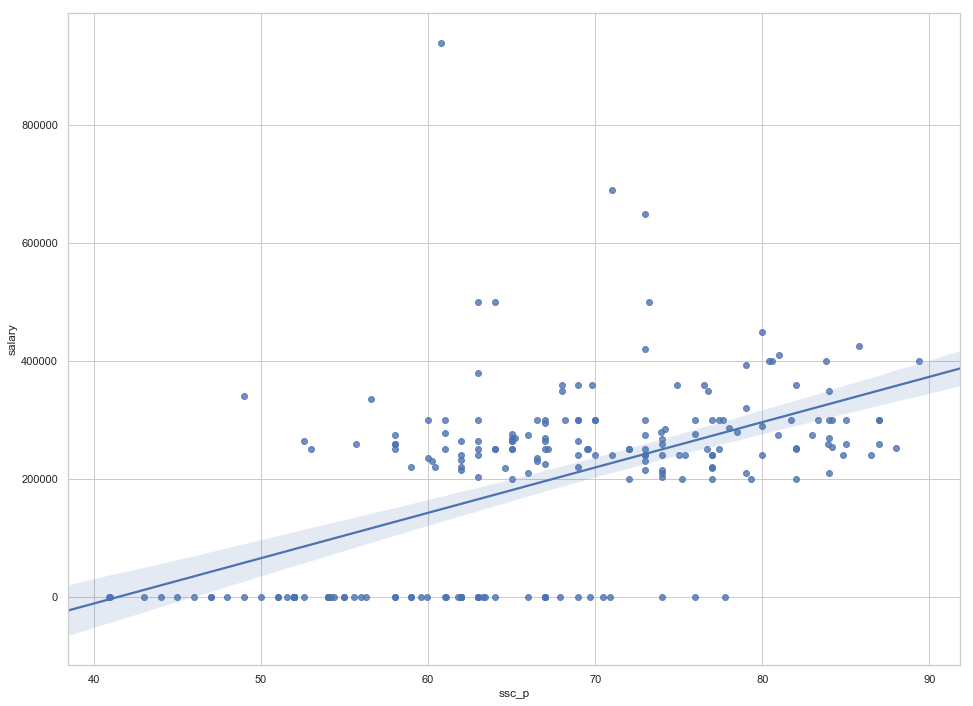

In [41]:
f, ax = plt.subplots(figsize=(16, 12))
sns.regplot(x="ssc_p", y="salary", data=data)

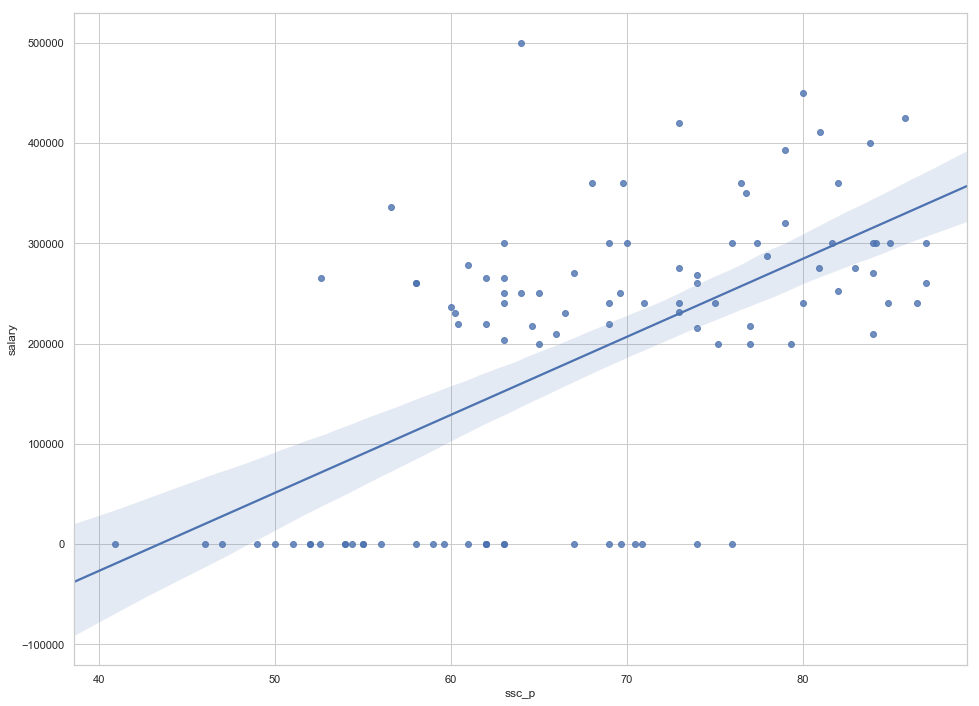

In [42]:
f, ax = plt.subplots(figsize=(16, 12))
sns.regplot(x="ssc_p", y="salary", data=data.iloc[0:100,:])

In [43]:
feature_cols = ['salary']
X = data[feature_cols]
y = data.ssc_p

reg = LinearRegression()
hp=reg.fit(X, y)

print(hp.intercept_)
print(hp.coef_)

59.82417078909048
[3.76403474e-05]


In [44]:
hp.score(X, y)

0.2895405396115258

In [26]:
#Getting the important columns for predictive analysis:
columns_needed =['gender','ssc_p','ssc_b','hsc_b','hsc_p','degree_p','degree_t']
data_x = data[columns_needed]
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 7 columns):
gender      215 non-null object
ssc_p       215 non-null float64
ssc_b       215 non-null object
hsc_b       215 non-null object
hsc_p       215 non-null float64
degree_p    215 non-null float64
degree_t    215 non-null object
dtypes: float64(3), object(4)
memory usage: 11.8+ KB


In [39]:
def cat_to_num(data_x,col):
    dummy = pd.get_dummies(data_x[col])
    del dummy[dummy.columns[-1]]#To avoid dummy variable trap
    data_x= pd.concat([data_x,dummy],axis =1)
    return data_x
for i in data_x.columns:
    if data_x[i].dtype ==object:
        print(i)
        data_x =cat_to_num(data_x,i)
data_x.drop(['gender','ssc_b','hsc_b','degree_t'],inplace =True,axis =1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['status'] = le.fit_transform(data['status'])
y = data['status']
x = data_x
x.info()
y.value_counts()
#Splitting data into training and testing sets:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(x,y,test_size=0.2)

gender
ssc_b
hsc_b
degree_t
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 8 columns):
ssc_p        215 non-null float64
hsc_p        215 non-null float64
degree_p     215 non-null float64
F            215 non-null uint8
Central      215 non-null uint8
Central      215 non-null uint8
Comm&Mgmt    215 non-null uint8
Others       215 non-null uint8
dtypes: float64(3), uint8(5)
memory usage: 6.2 KB


In [45]:
from sklearn.tree import DecisionTreeClassifier as DTC
model = DTC()
model.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,model.predict(X_test)))

0.7674418604651163


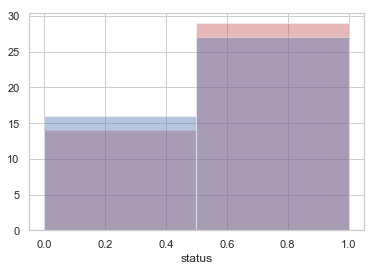

In [46]:
model.predict(X_test)
ax1 = sns.distplot(y_test,hist=True,kde =False,color ="r",label ="Actual Value")
sns.distplot(model.predict(X_test),color ="b",hist = True,kde =False, label = "Preicted Value",ax =ax1)